# KE5018 Time Series Forecasting

## Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load Data

In [2]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
train_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox
weekly_date,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,1.683670
2007-06-24,1,24-Jun-2007 (26),263.19,1.687012
2007-07-01,2,01-Jul-2007 (27),269.89,1.688067
2007-07-08,3,08-Jul-2007 (28),252.88,1.685303
2007-07-15,4,15-Jul-2007 (29),303.46,1.692792


In [3]:
train_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2007-06-17 to 2008-10-26
Data columns (total 4 columns):
week              72 non-null int64
GRPRatingsDate    72 non-null object
GRP               72 non-null float64
GRP_boxcox        72 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ KB


In [4]:
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)
test_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox
weekly_date,,,,
2008-11-02,72,02-Nov-2008 (45),206.61,1.676045
2008-11-09,73,09-Nov-2008 (46),188.68,1.671528
2008-11-16,74,16-Nov-2008 (47),197.64,1.673866
2008-11-23,75,23-Nov-2008 (48),193.16,1.672718
2008-11-30,76,30-Nov-2008 (49),184.74,1.670444


In [5]:
test_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2008-11-02 to 2009-03-15
Data columns (total 4 columns):
week              20 non-null int64
GRPRatingsDate    20 non-null object
GRP               20 non-null float64
GRP_boxcox        20 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 800.0+ bytes


## Simple Moving Average Smoothing

In [6]:
BOXCOX_LAMBDA = -0.5677106
train_ts_df['ma_1'] = inv_boxcox(train_ts_df['GRP_boxcox'].rolling(1).mean(), BOXCOX_LAMBDA)
train_ts_df['ma_2'] = inv_boxcox(train_ts_df['GRP_boxcox'].rolling(2).mean(), BOXCOX_LAMBDA)
train_ts_df['ma_3'] = inv_boxcox(train_ts_df['GRP_boxcox'].rolling(3).mean(), BOXCOX_LAMBDA)
train_ts_df['ma_5'] = inv_boxcox(train_ts_df['GRP_boxcox'].rolling(5).mean(), BOXCOX_LAMBDA)
train_ts_df['ma_7'] = inv_boxcox(train_ts_df['GRP_boxcox'].rolling(7).mean(), BOXCOX_LAMBDA)
train_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,ma_1,ma_2,ma_3,ma_5,ma_7
weekly_date,,,,,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,1.683670,243.60,NaN,NaN,NaN,NaN
2007-06-24,1,24-Jun-2007 (26),263.19,1.687012,263.19,253.098146,NaN,NaN,NaN
2007-07-01,2,01-Jul-2007 (27),269.89,1.688067,269.89,266.506995,258.508995,NaN,NaN
2007-07-08,3,08-Jul-2007 (28),252.88,1.685303,252.88,261.168044,261.839315,NaN,NaN
2007-07-15,4,15-Jul-2007 (29),303.46,1.692792,303.46,276.365490,274.180175,265.428324,NaN


For a 1 step prediction, we need to offset the moving average by 1 step. 

In [7]:
sma_df = train_ts_df[['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7']].copy()
sma_df.index = sma_df.index + DateOffset(days=7)
sma_df.columns = ['sma_1', 'sma_2', 'sma_3', 'sma_5', 'sma_7']
sma_df.head()

,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,
2007-06-24,243.60,NaN,NaN,NaN,NaN
2007-07-01,263.19,253.098146,NaN,NaN,NaN
2007-07-08,269.89,266.506995,258.508995,NaN,NaN
2007-07-15,252.88,261.168044,261.839315,NaN,NaN
2007-07-22,303.46,276.365490,274.180175,265.428324,NaN


In [8]:
train_ts_df = train_ts_df.join(sma_df, how='outer', sort=True)
train_ts_df.drop(['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7'], axis=1, inplace=True)
train_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,,
2007-06-17,0.0,17-Jun-2007 (25),243.60,1.683670,NaN,NaN,NaN,NaN,NaN
2007-06-24,1.0,24-Jun-2007 (26),263.19,1.687012,243.60,NaN,NaN,NaN,NaN
2007-07-01,2.0,01-Jul-2007 (27),269.89,1.688067,263.19,253.098146,NaN,NaN,NaN
2007-07-08,3.0,08-Jul-2007 (28),252.88,1.685303,269.89,266.506995,258.508995,NaN,NaN
2007-07-15,4.0,15-Jul-2007 (29),303.46,1.692792,252.88,261.168044,261.839315,NaN,NaN


### Do the Same for the Test Dataset

In [9]:
test_ts_df['ma_1'] = inv_boxcox(test_ts_df['GRP_boxcox'].rolling(1).mean(), BOXCOX_LAMBDA)
test_ts_df['ma_2'] = inv_boxcox(test_ts_df['GRP_boxcox'].rolling(2).mean(), BOXCOX_LAMBDA)
test_ts_df['ma_3'] = inv_boxcox(test_ts_df['GRP_boxcox'].rolling(3).mean(), BOXCOX_LAMBDA)
test_ts_df['ma_5'] = inv_boxcox(test_ts_df['GRP_boxcox'].rolling(5).mean(), BOXCOX_LAMBDA)
test_ts_df['ma_7'] = inv_boxcox(test_ts_df['GRP_boxcox'].rolling(7).mean(), BOXCOX_LAMBDA)
test_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,ma_1,ma_2,ma_3,ma_5,ma_7
weekly_date,,,,,,,,,
2008-11-02,72,02-Nov-2008 (45),206.61,1.676045,206.61,NaN,NaN,NaN,NaN
2008-11-09,73,09-Nov-2008 (46),188.68,1.671528,188.68,197.326152,NaN,NaN,NaN
2008-11-16,74,16-Nov-2008 (47),197.64,1.673866,197.64,193.078547,197.430681,NaN,NaN
2008-11-23,75,23-Nov-2008 (48),193.16,1.672718,193.16,195.379871,193.105692,NaN,NaN
2008-11-30,76,30-Nov-2008 (49),184.74,1.670444,184.74,188.876466,191.728788,193.937495,NaN


In [10]:
sma_df = test_ts_df[['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7']].copy()
sma_df.index = sma_df.index + DateOffset(days=7)
sma_df.columns = ['sma_1', 'sma_2', 'sma_3', 'sma_5', 'sma_7']
sma_df.head()

,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,
2008-11-09,206.61,NaN,NaN,NaN,NaN
2008-11-16,188.68,197.326152,NaN,NaN,NaN
2008-11-23,197.64,193.078547,197.430681,NaN,NaN
2008-11-30,193.16,195.379871,193.105692,NaN,NaN
2008-12-07,184.74,188.876466,191.728788,193.937495,NaN


In [11]:
test_ts_df = test_ts_df.join(sma_df, how='outer', sort=True)
test_ts_df.drop(['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7'], axis=1, inplace=True)
test_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,,
2008-11-02,72.0,02-Nov-2008 (45),206.61,1.676045,NaN,NaN,NaN,NaN,NaN
2008-11-09,73.0,09-Nov-2008 (46),188.68,1.671528,206.61,NaN,NaN,NaN,NaN
2008-11-16,74.0,16-Nov-2008 (47),197.64,1.673866,188.68,197.326152,NaN,NaN,NaN
2008-11-23,75.0,23-Nov-2008 (48),193.16,1.672718,197.64,193.078547,197.430681,NaN,NaN
2008-11-30,76.0,30-Nov-2008 (49),184.74,1.670444,193.16,195.379871,193.105692,NaN,NaN


### Training / Test Results

In [12]:
results_list = []

for i in train_ts_df.columns[4:]:

    my_train_df = train_ts_df[['GRP', i]].dropna()
    sma_train_mse = mean_squared_error(my_train_df['GRP'].values, my_train_df[i].values)
    sma_train_rmse = np.sqrt(sma_train_mse)
    sma_train_mape = np.sum(np.abs(my_train_df['GRP'].values - my_train_df[i].values) / my_train_df['GRP'].values) / len(my_train_df['GRP'].values) * 100
    
    my_test_df = test_ts_df[['GRP', i]].dropna()
    sma_test_mse = mean_squared_error(my_test_df['GRP'].values, my_test_df[i].values)
    sma_test_rmse = np.sqrt(sma_test_mse)
    sma_test_mape = np.sum(np.abs(my_test_df['GRP'].values - my_test_df[i].values) / my_test_df['GRP'].values) / len(my_test_df['GRP'].values) * 100
    
    results_list.append([sma_train_mse, sma_train_rmse, sma_train_mape, sma_test_mse, sma_test_rmse, sma_test_mape])

In [13]:
results_list

[[352.90136338028691,
  18.785669095890274,
  5.4634820055244431,
  337.26844210526139,
  18.364869781875978,
  7.1456034243186002],
 [361.91401863258591,
  19.024037916083586,
  5.5394157627029879,
  253.32805231822306,
  15.916282616183436,
  5.6073033239495338],
 [350.30910933470489,
  18.716546405111838,
  5.504060917355142,
  214.56606217921734,
  14.648073667865592,
  4.9180366703763978],
 [380.6054637521018,
  19.509112326092691,
  6.3405425295365863,
  206.20496494429543,
  14.359838611359649,
  5.1525805672650495],
 [441.62335309211483,
  21.01483649929532,
  6.8729106879018715,
  168.7213226011622,
  12.989277216271974,
  4.777523799893058]]

### Plot the Predicted Results

In [14]:
# Join the train and test datasets and results for plotting.

train_ts_df.index.intersection(test_ts_df.index)

DatetimeIndex(['2008-11-02'], dtype='datetime64[ns]', name='weekly_date', freq=None)

In [15]:
train_ts_df.loc[train_ts_df.index.intersection(test_ts_df.index)]

,week,GRPRatingsDate,GRP,GRP_boxcox,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,,
2008-11-02,NaN,NaN,NaN,NaN,170.74,183.757014,189.329129,195.819654,205.728065


In [16]:
test_ts_df.loc[train_ts_df.index.intersection(test_ts_df.index)]

,week,GRPRatingsDate,GRP,GRP_boxcox,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,,
2008-11-02,72.0,02-Nov-2008 (45),206.61,1.676045,NaN,NaN,NaN,NaN,NaN


In [17]:
test_ts_df.update(train_ts_df)
test_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,,
2008-11-02,72.0,02-Nov-2008 (45),206.61,1.676045,170.74,183.757014,189.329129,195.819654,205.728065
2008-11-09,73.0,09-Nov-2008 (46),188.68,1.671528,206.61,NaN,NaN,NaN,NaN
2008-11-16,74.0,16-Nov-2008 (47),197.64,1.673866,188.68,197.326152,NaN,NaN,NaN
2008-11-23,75.0,23-Nov-2008 (48),193.16,1.672718,197.64,193.078547,197.430681,NaN,NaN
2008-11-30,76.0,30-Nov-2008 (49),184.74,1.670444,193.16,195.379871,193.105692,NaN,NaN


In [18]:
train_ts_df.drop(train_ts_df.index.intersection(test_ts_df.index), inplace=True)
train_ts_df.tail()

,week,GRPRatingsDate,GRP,GRP_boxcox,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,,
2008-09-28,67.0,28-Sep-2008 (40),219.91,1.679017,236.31,234.245938,226.605650,215.384161,215.159033
2008-10-05,68.0,05-Oct-2008 (41),193.84,1.672895,219.91,227.878898,229.308426,218.430031,216.673412
2008-10-12,69.0,12-Oct-2008 (42),201.30,1.674773,193.84,206.230820,215.555804,218.092301,212.704914
2008-10-19,70.0,19-Oct-2008 (43),198.40,1.674056,201.30,197.514798,204.566369,215.689609,212.112401
2008-10-26,71.0,26-Oct-2008 (44),170.74,1.666279,198.40,199.841753,197.809176,209.045264,212.619359


In [19]:
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df.loc['2008-05-01':'2008-07-15', :]

,week,GRPRatingsDate,GRP,GRP_boxcox,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,,
2008-05-04,46.0,04-May-2008 (19),210.17,1.676870,210.24,215.013920,216.054667,218.282346,226.849968
2008-05-11,47.0,11-May-2008 (20),228.25,1.680741,210.17,210.204995,213.380002,214.080263,220.062899
2008-05-18,48.0,18-May-2008 (21),227.32,1.680554,228.25,218.917704,215.963709,217.192798,218.463582
2008-05-25,49.0,25-May-2008 (22),218.16,1.678643,227.32,227.784256,221.663595,218.965542,217.860966
2008-06-01,50.0,01-Jun-2008 (23),228.92,1.680876,218.16,222.666176,224.503432,218.606244,218.734912
2008-06-08,51.0,08-Jun-2008 (24),231.79,1.681444,228.92,223.438496,224.720710,222.370894,220.229104
2008-06-15,52.0,15-Jun-2008 (25),231.19,1.681326,231.79,230.347993,226.169183,226.813051,221.863547
2008-06-22,53.0,22-Jun-2008 (26),214.32,1.677804,231.19,231.489695,230.628127,227.390594,224.918003
2008-06-29,54.0,29-Jun-2008 (27),233.76,1.681827,214.32,222.504579,225.533916,224.692066,225.568802


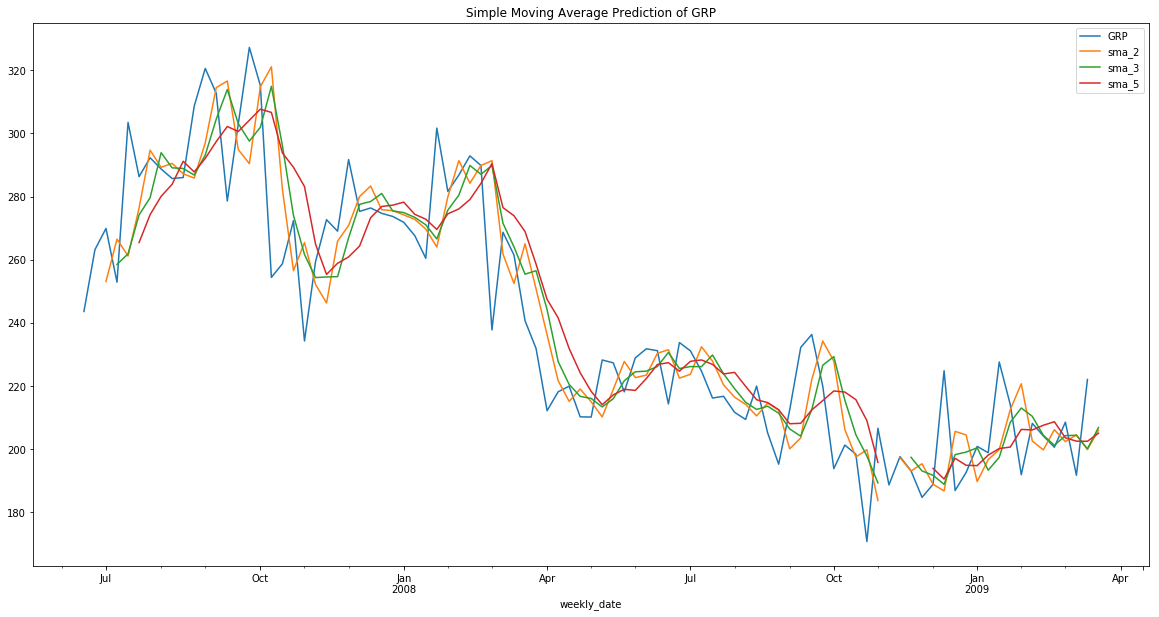

In [20]:
new_ts_df[['GRP', 'sma_2', 'sma_3', 'sma_5']].plot(figsize=(20, 10), title='Simple Moving Average Prediction of GRP')

In [21]:
results_df = pd.DataFrame(results_list,
                          index=['Simple Moving 1wk Average', 'Simple Moving 2wk Average', 'Simple Moving 3wk Average',
                                 'Simple Moving 5wk Average', 'Simple Moving 7wk Average',
                                 ],
                          columns=['train mse', 'train rmse', 'train mape', 'test mse', 'test rmse', 'test mape'])
results_df

,train mse,train rmse,train mape,test mse,test rmse,test mape
Simple Moving 1wk Average,352.901363,18.785669,5.463482,337.268442,18.364870,7.145603
Simple Moving 2wk Average,361.914019,19.024038,5.539416,253.328052,15.916283,5.607303
Simple Moving 3wk Average,350.309109,18.716546,5.504061,214.566062,14.648074,4.918037
Simple Moving 5wk Average,380.605464,19.509112,6.340543,206.204965,14.359839,5.152581
Simple Moving 7wk Average,441.623353,21.014836,6.872911,168.721323,12.989277,4.777524


The simple 3 week moving average model has the best MSE and plot, let's check the residuals and also stationarity of the data.

### Analysis of Residuals

In [22]:
my_df = train_ts_df.dropna()
residuals = my_df['GRP'].values - my_df['sma_3']
residuals[:10]

weekly_date
2007-08-05    -5.155951
2007-08-12    -3.380287
2007-08-19    -2.870392
2007-08-26    21.785015
2007-09-02    27.436974
2007-09-09     8.149039
2007-09-16   -35.301885
2007-09-23     0.004589
2007-09-30    29.669595
2007-10-07    13.209703
Name: sma_3, dtype: float64

In [23]:
sma3_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
sma3_res.fit(my_df['week'].values.reshape(-1, 1), residuals)
sma3_res_pred = sma3_res.predict(my_df['week'].values.reshape(-1, 1))

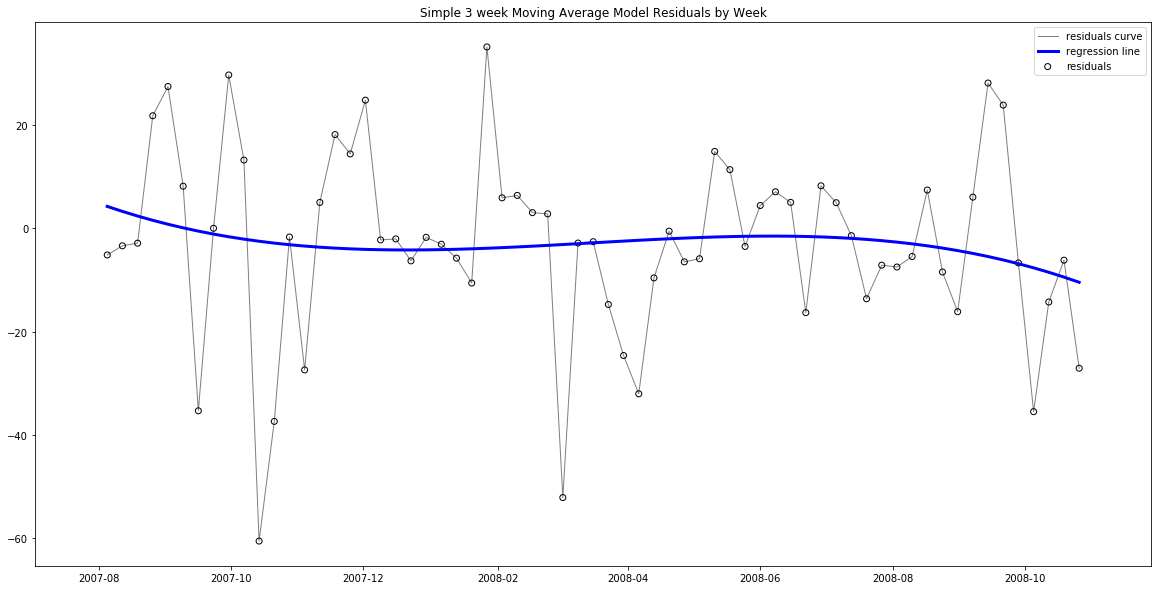

In [24]:
plt.figure(figsize=(20, 10))
plt.title('Simple 3 week Moving Average Model Residuals by Week')
plt.scatter(my_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(my_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(my_df.index.values, sma3_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

The model is well fit until towards the end of the time series.

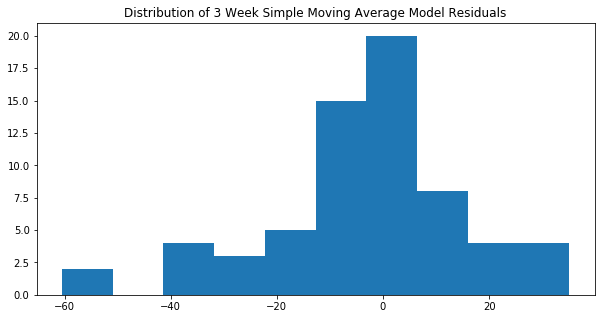

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of 3 Week Simple Moving Average Model Residuals')
plt.hist(residuals)
plt.show()

In [26]:
lb = acorr_ljungbox(residuals, lags=10)
lb_df = pd.DataFrame({'Lag':range(1, len(lb[0])+1), 'Ljung-Box_Stat':lb[0], 'P-value':lb[1]})
lb_df

,Lag,Ljung-Box_Stat,P-value
0,1,4.952318,0.026056
1,2,7.085083,0.028940
2,3,7.501126,0.057530
3,4,7.895612,0.095478
4,5,8.734857,0.120119
5,6,11.861440,0.065132
6,7,14.479618,0.043280
7,8,14.675295,0.065775
8,9,14.906926,0.093524
9,10,15.028322,0.131033


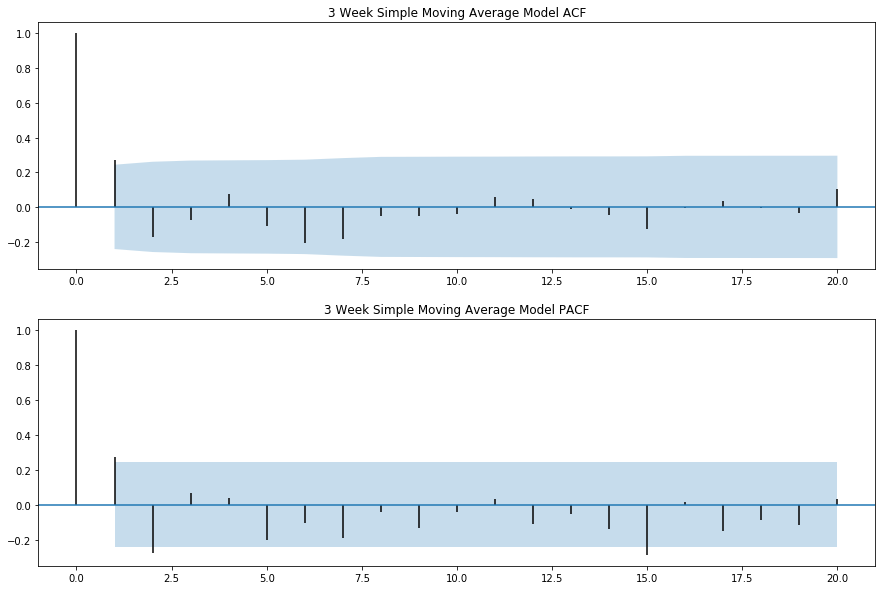

In [27]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(211)
acf = plot_acf(residuals, ax, lags=20, title='3 Week Simple Moving Average Model ACF', marker=None)
ax = plt.subplot(212)
pacf = plot_pacf(residuals, ax, lags=20,  title='3 Week Simple Moving Average Model PACF', marker=None)
plt.show()

/home/tkokkeng/Documents/KE5108/TimeSeries/venv/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


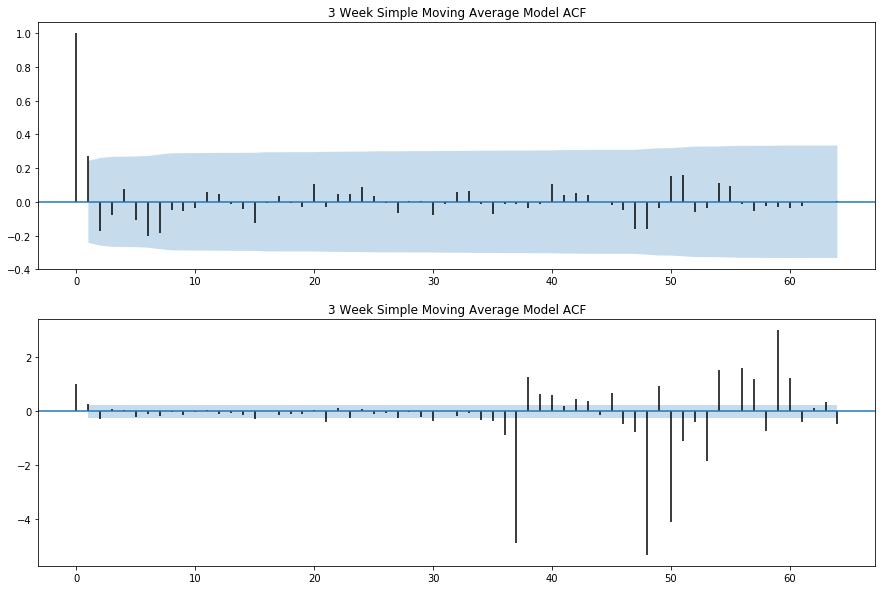

In [28]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(211)
acf = plot_acf(residuals, ax,  title='3 Week Simple Moving Average Model ACF', marker=None)
ax = plt.subplot(212)
pacf = plot_pacf(residuals, ax,  title='3 Week Simple Moving Average Model ACF', marker=None)
plt.show()

The model looks good relative to the residuals which show no auto-correlation, are close to gaussian distribution.

### Check for Stationarity

The null hypothesis of the Augmented Dickey-Fuller test is that the time series data is not stationary, with the alternative that it is. If the pvalue is above a critical size, then we cannot reject that non-stationary null hypothesis. The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the null hypothesis.

In [29]:
test_df = adfuller(new_ts_df['GRP'].dropna(), autolag='AIC')
test_df

(-1.2159654278021805,
 0.66669035814933597,
 2,
 89,
 {'1%': -3.506057133647011,
  '10%': -2.5844100201994697,
  '5%': -2.8946066061911946},
 674.40002612555054)

The ADF statistic is (-1.22) < the 5% critical value (-2.89), therefore we conclude the time series data is not stationary. Note that the plot of the GRP time series data showed elements of non-stationarity as well.

## Simple Exponential Smoothing

### Reload Data

In [30]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)

### Calculate the Exponential Moving Averages for the Train Dataset

In [31]:
train_ts_df['sema_2'] = inv_boxcox(pd.ewma(train_ts_df['GRP_boxcox'], span=2, min_periods=2), BOXCOX_LAMBDA)
train_ts_df['sema_3'] = inv_boxcox(pd.ewma(train_ts_df['GRP_boxcox'], span=3, min_periods=3), BOXCOX_LAMBDA)
train_ts_df['sema_5'] = inv_boxcox(pd.ewma(train_ts_df['GRP_boxcox'], span=5, min_periods=5), BOXCOX_LAMBDA)
train_ts_df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=2,min_periods=2,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=3,min_periods=3,adjust=True,ignore_na=False).mean()
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=5,min_periods=5,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


,week,GRPRatingsDate,GRP,GRP_boxcox,sema_2,sema_3,sema_5
weekly_date,,,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,1.683670,NaN,NaN,NaN
2007-06-24,1,24-Jun-2007 (26),263.19,1.687012,258.066755,NaN,NaN
2007-07-01,2,01-Jul-2007 (27),269.89,1.688067,266.163105,263.972625,NaN
2007-07-08,3,08-Jul-2007 (28),252.88,1.685303,257.080830,257.963756,NaN
2007-07-15,4,15-Jul-2007 (29),303.46,1.692792,286.768229,279.998085,274.176123


In [32]:
sema_df = train_ts_df[['sema_2', 'sema_3', 'sema_5']].copy()
sema_df.index = sema_df.index + DateOffset(days=7)
sema_df.head()

,sema_2,sema_3,sema_5
weekly_date,,,
2007-06-24,NaN,NaN,NaN
2007-07-01,258.066755,NaN,NaN
2007-07-08,266.163105,263.972625,NaN
2007-07-15,257.080830,257.963756,NaN
2007-07-22,286.768229,279.998085,274.176123


In [33]:
train_ts_df.drop(['sema_2', 'sema_3', 'sema_5'], axis=1, inplace=True)
train_ts_df = train_ts_df.join(sema_df, how='outer', sort=True)
train_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,sema_2,sema_3,sema_5
weekly_date,,,,,,,
2007-06-17,0.0,17-Jun-2007 (25),243.60,1.683670,NaN,NaN,NaN
2007-06-24,1.0,24-Jun-2007 (26),263.19,1.687012,NaN,NaN,NaN
2007-07-01,2.0,01-Jul-2007 (27),269.89,1.688067,258.066755,NaN,NaN
2007-07-08,3.0,08-Jul-2007 (28),252.88,1.685303,266.163105,263.972625,NaN
2007-07-15,4.0,15-Jul-2007 (29),303.46,1.692792,257.080830,257.963756,NaN


### Do the Same for the Test Dataset

In [34]:
test_ts_df['sema_2'] = inv_boxcox(pd.ewma(test_ts_df['GRP_boxcox'], span=2, min_periods=2), BOXCOX_LAMBDA)
test_ts_df['sema_3'] = inv_boxcox(pd.ewma(test_ts_df['GRP_boxcox'], span=3, min_periods=3), BOXCOX_LAMBDA)
test_ts_df['sema_5'] = inv_boxcox(pd.ewma(test_ts_df['GRP_boxcox'], span=5, min_periods=5), BOXCOX_LAMBDA)
test_ts_df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=2,min_periods=2,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=3,min_periods=3,adjust=True,ignore_na=False).mean()
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=5,min_periods=5,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


,week,GRPRatingsDate,GRP,GRP_boxcox,sema_2,sema_3,sema_5
weekly_date,,,,,,,
2008-11-02,72,02-Nov-2008 (45),206.61,1.676045,NaN,NaN,NaN
2008-11-09,73,09-Nov-2008 (46),188.68,1.671528,192.927168,NaN,NaN
2008-11-16,74,16-Nov-2008 (47),197.64,1.673866,196.170843,196.230816,NaN
2008-11-23,75,23-Nov-2008 (48),193.16,1.672718,194.130532,194.583602,NaN
2008-11-30,76,30-Nov-2008 (49),184.74,1.670444,187.764033,189.403071,191.030592


In [35]:
sema_df = test_ts_df[['sema_2', 'sema_3', 'sema_5']].copy()
sema_df.index = sema_df.index + DateOffset(days=7)
sema_df.head()

,sema_2,sema_3,sema_5
weekly_date,,,
2008-11-09,NaN,NaN,NaN
2008-11-16,192.927168,NaN,NaN
2008-11-23,196.170843,196.230816,NaN
2008-11-30,194.130532,194.583602,NaN
2008-12-07,187.764033,189.403071,191.030592


In [36]:
test_ts_df.drop(['sema_2', 'sema_3', 'sema_5'], axis=1, inplace=True)
test_ts_df = test_ts_df.join(sema_df, how='outer', sort=True)
test_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,sema_2,sema_3,sema_5
weekly_date,,,,,,,
2008-11-02,72.0,02-Nov-2008 (45),206.61,1.676045,NaN,NaN,NaN
2008-11-09,73.0,09-Nov-2008 (46),188.68,1.671528,NaN,NaN,NaN
2008-11-16,74.0,16-Nov-2008 (47),197.64,1.673866,192.927168,NaN,NaN
2008-11-23,75.0,23-Nov-2008 (48),193.16,1.672718,196.170843,196.230816,NaN
2008-11-30,76.0,30-Nov-2008 (49),184.74,1.670444,194.130532,194.583602,NaN


### Training / Test Results

In [37]:
for i in train_ts_df.columns[4:]:

    my_train_df = train_ts_df[['GRP', i]].dropna()
    sema_train_mse = mean_squared_error(my_train_df['GRP'].values, my_train_df[i].values)
    sema_train_rmse = np.sqrt(sema_train_mse)
    sema_train_mape = np.sum(np.abs(my_train_df['GRP'].values - my_train_df[i].values) / my_train_df['GRP'].values) / len(my_train_df['GRP'].values) * 100
    
    my_test_df = test_ts_df[['GRP', i]].dropna()
    sema_test_mse = mean_squared_error(my_test_df['GRP'].values, my_test_df[i].values)
    sema_test_rmse = np.sqrt(sema_test_mse)
    sema_test_mape = np.sum(np.abs(my_test_df['GRP'].values - my_test_df[i].values) / my_test_df['GRP'].values) / len(my_test_df['GRP'].values) * 100
    
    results_list.append([sema_train_mse, sema_train_rmse, sema_train_mape, sema_test_mse, sema_test_rmse, sema_test_mape])

### Plot the Predicted Results

In [38]:
# Join the train and test datasets and results for plotting.

train_ts_df.index.intersection(test_ts_df.index)

DatetimeIndex(['2008-11-02'], dtype='datetime64[ns]', name='weekly_date', freq=None)

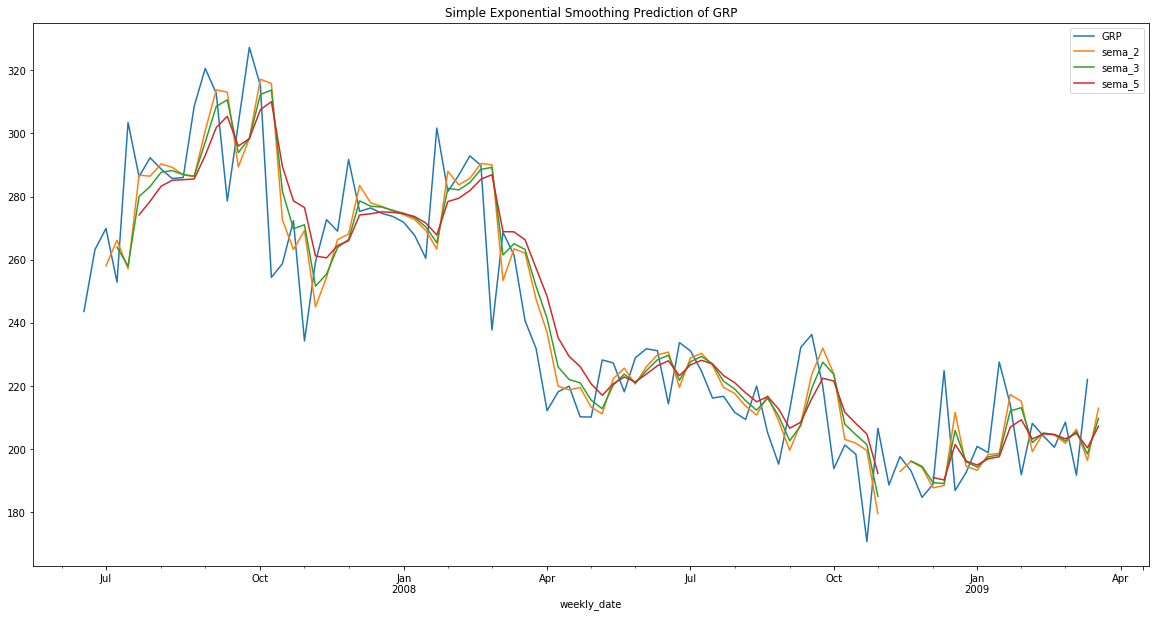

In [39]:
test_ts_df.update(train_ts_df)
train_ts_df.drop(train_ts_df.index.intersection(test_ts_df.index), inplace=True)
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df[['GRP', 'sema_2', 'sema_3', 'sema_5']].plot(figsize=(20, 10), title='Simple Exponential Smoothing Prediction of GRP')

In [40]:
results_df = pd.DataFrame(results_list,
                          index=['Simple Moving 1wk Average', 'Simple Moving 2wk Average', 'Simple Moving 3wk Average',
                                 'Simple Moving 5wk Average', 'Simple Moving 7wk Average',
                                 'Simple Exponenting 2wk Smoothing', 'Simple Exponenting 3wk Smoothing', 'Simple Exponenting 5wk Smoothing'
                                 ],
                          columns=['train mse', 'train rmse', 'train mape', 'test mse', 'test rmse', 'test mape'])
results_df

,train mse,train rmse,train mape,test mse,test rmse,test mape
Simple Moving 1wk Average,352.901363,18.785669,5.463482,337.268442,18.364870,7.145603
Simple Moving 2wk Average,361.914019,19.024038,5.539416,253.328052,15.916283,5.607303
Simple Moving 3wk Average,350.309109,18.716546,5.504061,214.566062,14.648074,4.918037
Simple Moving 5wk Average,380.605464,19.509112,6.340543,206.204965,14.359839,5.152581
Simple Moving 7wk Average,441.623353,21.014836,6.872911,168.721323,12.989277,4.777524
Simple Exponenting 2wk Smoothing,321.294801,17.924698,5.117941,250.679912,15.832874,5.522677
Simple Exponenting 3wk Smoothing,325.606934,18.044582,5.270035,232.697196,15.254416,5.288690
Simple Exponenting 5wk Smoothing,329.641487,18.156032,5.576101,228.968145,15.131693,5.306618


Based on the test rmse, the 3-week simple exponential smoothing model performs the best.

### Analysis of Residuals

In [41]:
my_df = train_ts_df.dropna()
residuals = my_df['GRP'].values - my_df['sema_3']
residuals[:10]

weekly_date
2007-07-22     6.291915
2007-07-29     9.113418
2007-08-05     1.017400
2007-08-12    -2.512591
2007-08-19    -0.939526
2007-08-26    22.111300
2007-09-02    23.352328
2007-09-09     4.119350
2007-09-16   -32.019871
2007-09-23     9.153361
Name: sema_3, dtype: float64

In [42]:
sema3_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
sema3_res.fit(my_df['week'].values.reshape(-1, 1), residuals)
sema3_res_pred = sema3_res.predict(my_df['week'].values.reshape(-1, 1))

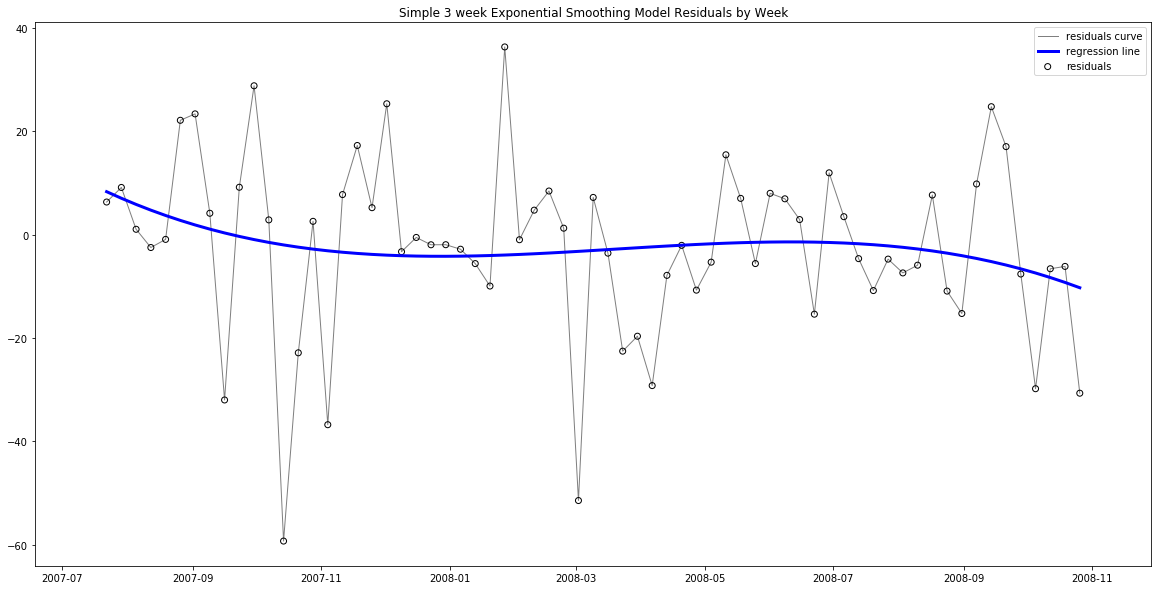

In [43]:
plt.figure(figsize=(20, 10))
plt.title('Simple 3 week Exponential Smoothing Model Residuals by Week')
plt.scatter(my_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(my_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(my_df.index.values, sema3_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

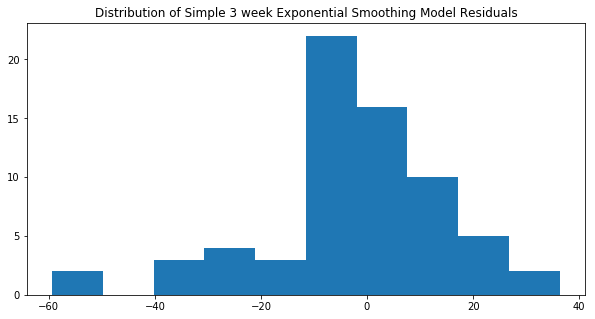

In [44]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of Simple 3 week Exponential Smoothing Model Residuals')
plt.hist(residuals)
plt.show()

In [45]:
lb = acorr_ljungbox(residuals, lags=10)
lb_df = pd.DataFrame({'Lag':range(1, len(lb[0])+1), 'Ljung-Box_Stat':lb[0], 'P-value':lb[1]})
lb_df

,Lag,Ljung-Box_Stat,P-value
0,1,1.646062,0.199496
1,2,3.913736,0.141300
2,3,4.268150,0.233927
3,4,4.982097,0.289139
4,5,5.804687,0.325690
5,6,7.834769,0.250460
6,7,10.373454,0.168379
7,8,10.455743,0.234484
8,9,10.549337,0.307868
9,10,10.907054,0.364805


/home/tkokkeng/Documents/KE5108/TimeSeries/venv/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


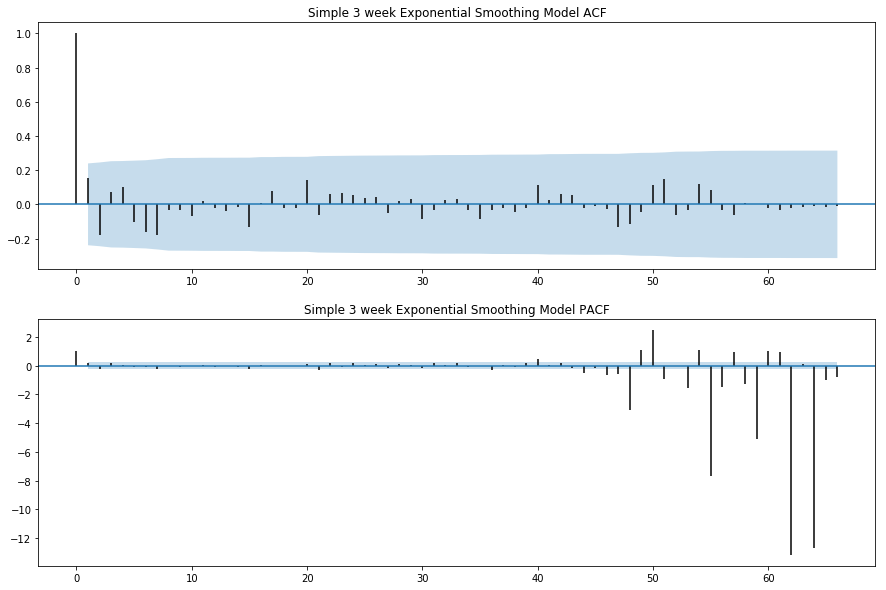

In [46]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(211)
acf = plot_acf(residuals, ax, title='Simple 3 week Exponential Smoothing Model ACF', marker=None)
ax = plt.subplot(212)
pacf = plot_pacf(residuals, ax,  title='Simple 3 week Exponential Smoothing Model PACF', marker=None)
plt.show()

The 3 week simple exponential smoothing model looks good relative to the residuals which show no auto-correlation, are close to gaussian distribution.

## Simple Exponential Smoothing Using StatsModels

In [47]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)

In [48]:
# Set smoothing level to None, The model will automatically optimize the value.
ses_train = sm.tsa.SimpleExpSmoothing(train_ts_df['GRP_boxcox'].values).fit(smoothing_level=None)
ses_train

In [49]:
ses_train.params

{'damping_slope': nan,
 'initial_level': 1.6849135416865406,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.65877780993577018,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [50]:
train_ts_df['ses'] = inv_boxcox(ses_train.predict(0, len(train_ts_df)-1), BOXCOX_LAMBDA)
train_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,ses
weekly_date,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,1.683670,250.616316
2007-06-24,1,24-Jun-2007 (26),263.19,1.687012,245.959131
2007-07-01,2,01-Jul-2007 (27),269.89,1.688067,257.103326
2007-07-08,3,08-Jul-2007 (28),252.88,1.685303,265.416957
2007-07-15,4,15-Jul-2007 (29),303.46,1.692792,257.051592


In [51]:
train_ts_df.tail()

,week,GRPRatingsDate,GRP,GRP_boxcox,ses
weekly_date,,,,,
2008-09-28,67,28-Sep-2008 (40),219.91,1.679017,231.801634
2008-10-05,68,05-Oct-2008 (41),193.84,1.672895,223.858009
2008-10-12,69,12-Oct-2008 (42),201.30,1.674773,203.334180
2008-10-19,70,19-Oct-2008 (43),198.40,1.674056,201.990508
2008-10-26,71,26-Oct-2008 (44),170.74,1.666279,199.613837


In [52]:
ses_test = sm.tsa.SimpleExpSmoothing(test_ts_df['GRP_boxcox'].values).fit(ses_train.params['smoothing_level'])

In [53]:
test_ts_df['ses'] = inv_boxcox(ses_test.predict(0, len(test_ts_df)-1), BOXCOX_LAMBDA)
test_ts_df.head()

,week,GRPRatingsDate,GRP,GRP_boxcox,ses
weekly_date,,,,,
2008-11-02,72,02-Nov-2008 (45),206.61,1.676045,201.056694
2008-11-09,73,09-Nov-2008 (46),188.68,1.671528,204.688347
2008-11-16,74,16-Nov-2008 (47),197.64,1.673866,193.914860
2008-11-23,75,23-Nov-2008 (48),193.16,1.672718,196.356383
2008-11-30,76,30-Nov-2008 (49),184.74,1.670444,194.241451


In [54]:
ses_train_mse = mean_squared_error(train_ts_df['GRP'].values, train_ts_df['ses'].values)
ses_train_rmse = np.sqrt(ses_train_mse)
ses_train_mape = np.sum(np.abs(train_ts_df['GRP'].values - train_ts_df['ses'].values) / train_ts_df['GRP'].values) / len(train_ts_df['GRP'].values) * 100
ses_test_mse = mean_squared_error(test_ts_df['GRP'].values, test_ts_df['ses'].values)
ses_test_rmse = np.sqrt(ses_test_mse)
ses_test_mape = np.sum(np.abs(test_ts_df['GRP'].values - test_ts_df['ses'].values) / test_ts_df['GRP'].values) / len(test_ts_df['GRP'].values) * 100

results_list.append([ses_train_mse, ses_train_rmse, ses_train_mape, ses_test_mse, ses_test_rmse, ses_test_mape])

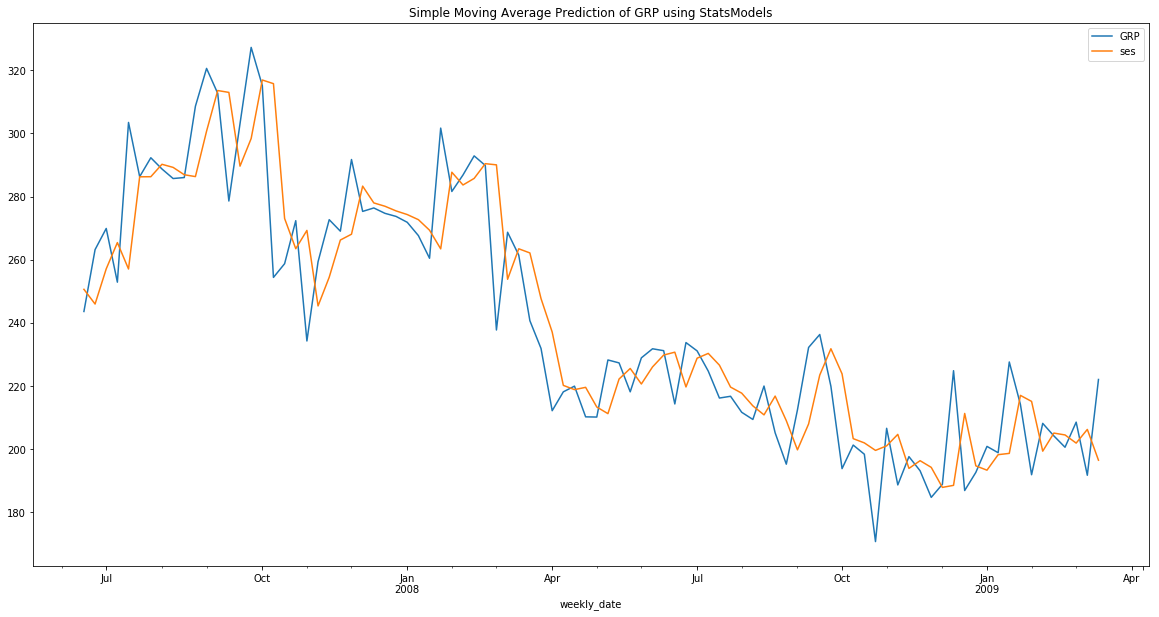

In [55]:
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df[['GRP', 'ses']].plot(figsize=(20, 10), title='Simple Moving Average Prediction of GRP using StatsModels')

In [56]:
residuals = train_ts_df['GRP'].values - train_ts_df['ses']
residuals[:10]

weekly_date
2007-06-17    -7.016316
2007-06-24    17.230869
2007-07-01    12.786674
2007-07-08   -12.536957
2007-07-15    46.408408
2007-07-22     0.046926
2007-07-29     6.006013
2007-08-05    -1.488591
2007-08-12    -3.526592
2007-08-19    -0.885739
Name: ses, dtype: float64

In [57]:
ses_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
ses_res.fit(train_ts_df['week'].values.reshape(-1, 1), residuals)
ses_res_pred = ses_res.predict(train_ts_df['week'].values.reshape(-1, 1))

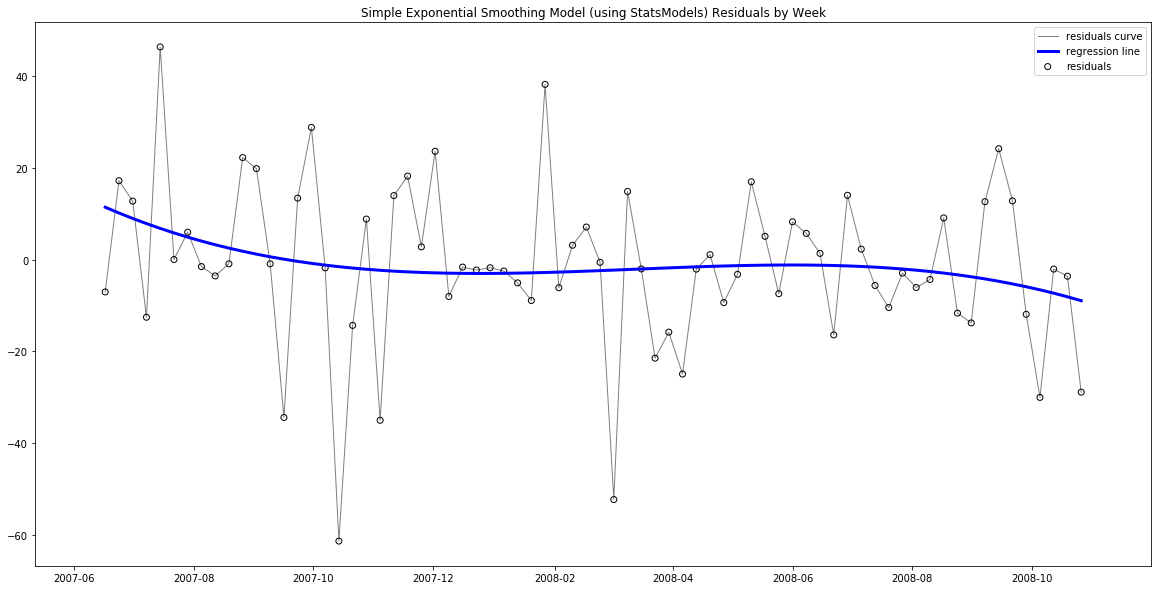

In [58]:
plt.figure(figsize=(20, 10))
plt.title('Simple Exponential Smoothing Model (using StatsModels) Residuals by Week')
plt.scatter(train_ts_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(train_ts_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(train_ts_df.index.values, ses_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

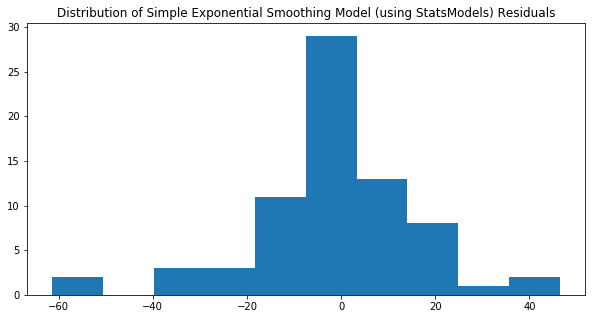

In [59]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of Simple Exponential Smoothing Model (using StatsModels) Residuals')
plt.hist(residuals)
plt.show()

In [60]:
lb = acorr_ljungbox(residuals, lags=10)
lb_df = pd.DataFrame({'Lag':range(1, len(lb[0])+1), 'Ljung-Box_Stat':lb[0], 'P-value':lb[1]})
lb_df

,Lag,Ljung-Box_Stat,P-value
0,1,0.003243,0.954590
1,2,3.132906,0.208784
2,3,3.874688,0.275317
3,4,4.605875,0.330177
4,5,5.082596,0.405883
5,6,5.520254,0.479012
6,7,6.384970,0.495585
7,8,6.421770,0.600097
8,9,6.631708,0.675402
9,10,6.633652,0.759518


/home/tkokkeng/Documents/KE5108/TimeSeries/venv/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


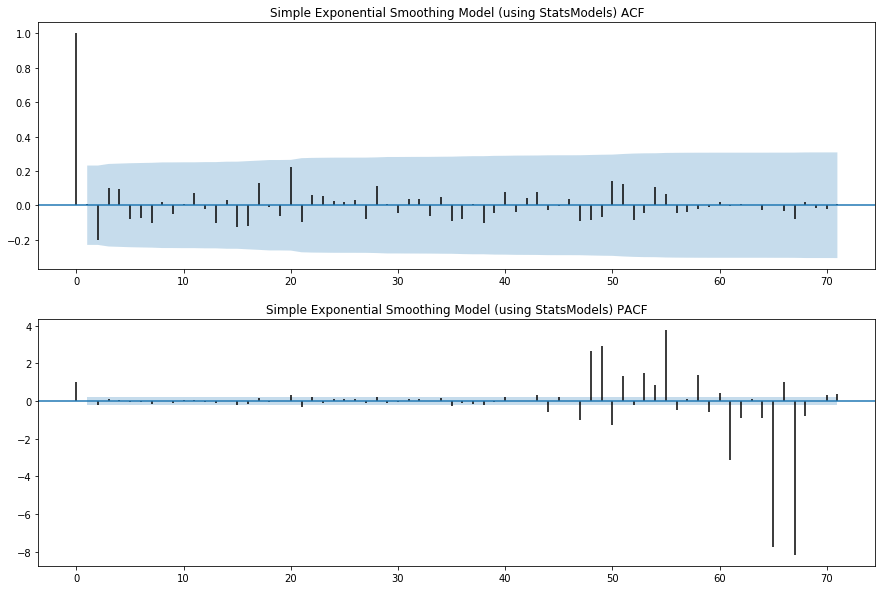

In [61]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(211)
acf = plot_acf(residuals, ax, title='Simple Exponential Smoothing Model (using StatsModels) ACF', marker=None)
ax = plt.subplot(212)
pacf = plot_pacf(residuals, ax, title='Simple Exponential Smoothing Model (using StatsModels) PACF', marker=None)
plt.show()

## Conclusion

In [62]:
results_df = pd.DataFrame(results_list,
                          index=['Simple Moving 1wk Average', 'Simple Moving 2wk Average', 'Simple Moving 3wk Average', 'Simple Moving 5wk Average', 'Simple Moving 7wk Average',
                                 'Simple Exponenting 2wk Smoothing', 'Simple Exponenting 3wk Smoothing', 'Simple Exponenting 5wk Smoothing',
                                 'Simple Exponential Smoothing using StatsModels'
                                 ],
                          columns=['train mse', 'train rmse', 'train mape','test mse', 'test rmse', 'test mape'])
results_df

,train mse,train rmse,train mape,test mse,test rmse,test mape
Simple Moving 1wk Average,352.901363,18.785669,5.463482,337.268442,18.364870,7.145603
Simple Moving 2wk Average,361.914019,19.024038,5.539416,253.328052,15.916283,5.607303
Simple Moving 3wk Average,350.309109,18.716546,5.504061,214.566062,14.648074,4.918037
Simple Moving 5wk Average,380.605464,19.509112,6.340543,206.204965,14.359839,5.152581
Simple Moving 7wk Average,441.623353,21.014836,6.872911,168.721323,12.989277,4.777524
Simple Exponenting 2wk Smoothing,321.294801,17.924698,5.117941,250.679912,15.832874,5.522677
Simple Exponenting 3wk Smoothing,325.606934,18.044582,5.270035,232.697196,15.254416,5.288690
Simple Exponenting 5wk Smoothing,329.641487,18.156032,5.576101,228.968145,15.131693,5.306618
Simple Exponential Smoothing using StatsModels,317.139442,17.808409,5.107219,238.196755,15.433624,5.487067
